# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [5]:
# Load pickled data
import pickle, os, urllib.request, sys
from zipfile import ZipFile

# path where data should be placed
data_dir = os.path.join(os.getcwd(), "data")
os.makedirs(data_dir, exist_ok = True)

def dl_progress(count, block_size, total_size):
    """Progress bar used during download."""
    length = 50
    current_size = count * block_size
    done = current_size * length // total_size
    togo = length - done
    prog = "[" + done * "=" + togo * "-" + "]"
    sys.stdout.write(prog)
    if(current_size < total_size):
        sys.stdout.write("\r")
    else:
        sys.stdout.write("\n")
    sys.stdout.flush()


def download_data():
    """Download required data."""
    data = {"traffic-signs-data.zip": "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip",
            "signnames.csv": "https://raw.githubusercontent.com/udacity/CarND-Traffic-Sign-Classifier-Project/master/signnames.csv"}
    local_data = {}
    for fname, url in data.items():
        path = os.path.join(data_dir, fname)
        if not os.path.isfile(path):
            print("Downloading {}".format(fname))
            urllib.request.urlretrieve(url, path, reporthook = dl_progress)
        else:
            print("Found {}. Skipping download.".format(fname))
        local_data[fname] = path
    return local_data


def extract_data(path):
    """Extract zip file if not already extracted."""
    with ZipFile(path) as f:
        targets = dict((fname, os.path.join(data_dir, fname)) for fname in f.namelist())
        if not all([os.path.exists(target) for target in targets.values()]):
            print("Extracting {}".format(path))
            f.extractall(data_dir)
        else:
            print("Skipping extraction of {}".format(path))
    return targets


def load_data(paths):
    """Load data from pickled files."""
    result = dict()
    for split in ["train", "valid", "test"]:
        fname = split + ".p"
        path = paths[fname]
        with open(path, "rb") as f:
            data = pickle.load(f)
        result[split] = (data["features"], data["labels"])
    return result


files = download_data()
data = extract_data(files["traffic-signs-data.zip"])
data = load_data(data)
    
X_train, y_train = data["train"]
X_valid, y_valid = data["valid"]
X_test, y_test = data["test"]

[==================================================]
[==========================================================================================================================================================================================================================================================================================================================================================================================================================]
Extracting /net/hci-storage02/groupfolders/compvis/pesser/nd/tsc/CarND-Traffic-Sign-Classifier-Project/data/traffic-signs-data.zip


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

|  Split   | Samples  |  Height  |  Width   | Channels | Classes  |
|------------------------------------------------------------------
|  train   |  34799   |    32    |    32    |    3     |    43    |
|  valid   |   4410   |    32    |    32    |    3     |    43    |
|   test   |  12630   |    32    |    32    |    3     |    43    |
|           Fraction           |         Traffic Sign         |
|--------------------------------------------------------------
|            5.78 %            |     Speed limit (50km/h)     |
|            5.69 %            |     Speed limit (30km/h)     |
|            5.52 %            |            Yield             |
|            0.52 %            |     Speed limit (20km/h)     |
|            0.52 %            | Dangerous curve to the left  |
|            0.52 %            |     Go straight or left      |


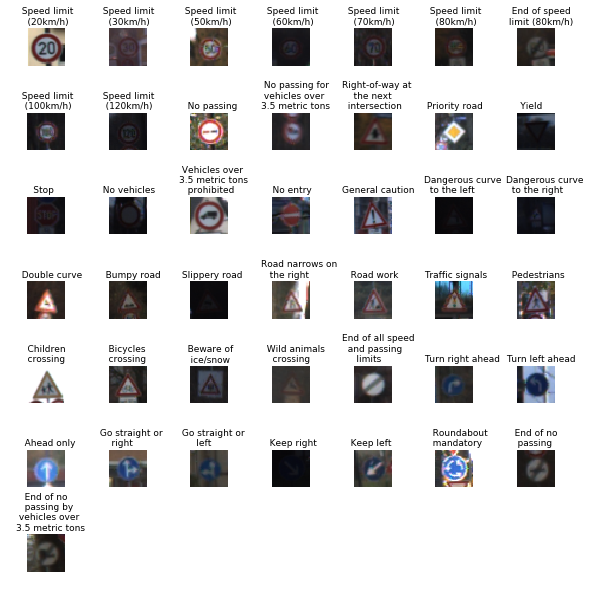

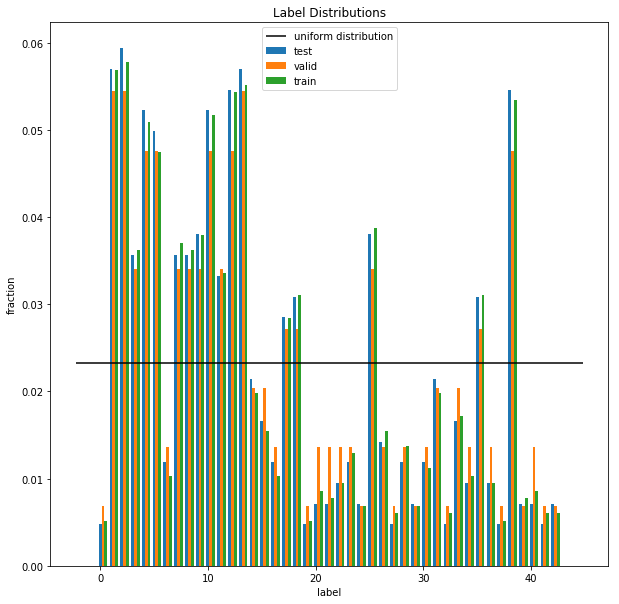

In [12]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import math, textwrap

# path where images should be placed
img_dir = os.path.join(os.getcwd(), "imgs")
os.makedirs(img_dir, exist_ok = True)

def load_signnames(path):
    """Return mapping from class index to class description."""
    data = np.genfromtxt(path, dtype = None, delimiter = ",", skip_header = 1)
    return dict((i, v.decode("utf-8")) for i, v in data)


def table_format(row, header = False, width = 10):
    """Format row as markdown table."""
    result = "|" + "|".join(str(entry).center(width) for entry in row) + "|"
    if header:
        l = len(result)
        result = result + "\n" + "|" + (l-1) * "-"
    return result


def basic_summary(data):
    """Summarize size of data for each split."""
    headers = ["Split", "Samples", "Height", "Width", "Channels", "Classes"]
    print(table_format(headers, header = True))
    for split in ["train", "valid", "test"]:
        X, y = data[split]
        n, h, w, c = X.shape
        n_classes = np.unique(y).shape[0]
        row = [split, n, h, w, c, n_classes]
        print(table_format(row))


def visualize_class_examples(data, signnames):
    """Visualize examples for each class."""
    n_classes = len(signnames)
    nrows = ncols = round(math.sqrt(n_classes))
    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (10,10))
    # use examples from the training split
    X, y = data["train"]
    examples = []
    for label in range(n_classes):
        examples.append(X[y == label][0])
    for i in range(nrows):
        for j in range(ncols):
            idx = i*ncols + j
            ax = axes[i, j]
            ax.set_axis_off()
            if idx < n_classes:
                img = examples[i*ncols + j]
                ax.imshow(img)
                # wrapped and center aligned label description
                ax.text(-10.0, -4.0,
                        "\n".join(line.center(16) for line in textwrap.wrap(signnames[idx], 16)),
                        fontsize = 9)
    fig.subplots_adjust(hspace = 1.25)
    fig.savefig(os.path.join(img_dir, "class_examples.png"))


def visualize_label_distributions(data, signnames):
    """Visualize distribution of labels."""
    n_classes = len(signnames)
    n_splits = len(data)
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111)
    width = 0.8 / n_splits
    for i, split in enumerate(data.keys()):
        X, y = data[split]
        labels, counts = np.unique(y, return_counts = True)
        fraction = counts / y.shape[0]
        ax.bar(labels + i*width, fraction, width, label = split)
    ax.hlines(1.0/n_classes, *(ax.get_xlim()), label = "uniform distribution")
    ax.set_xlabel("label")
    ax.set_ylabel("fraction")
    ax.set_title("Label Distributions")
    ax.legend()
    fig.savefig(os.path.join(img_dir, "class_distributions.png"))


def most_common_labels(data, signnames):
    """Show which labels are most and least common."""
    n_classes = len(signnames)
    n_splits = len(data)
    X, y = data["train"]
    labels, counts = np.unique(y, return_counts = True)
    fractions = counts / y.shape[0]
    sorted_indices = sorted(np.arange(n_classes), key = lambda i: fractions[i])
    sorted_labels = labels[sorted_indices]
    sorted_fractions = fractions[sorted_indices]

    width = 30
    print(table_format(["Fraction", "Traffic Sign"], header = True, width = width))
    for i in range(3):
        l = signnames[sorted_labels[-1 - i]]
        f = "{:.2f} %".format(100.0*sorted_fractions[-1 - i])
        print(table_format([f, l], width = width))
    for i in range(3):
        l = signnames[sorted_labels[i]]
        f = "{:.2f} %".format(100.0*sorted_fractions[i])
        print(table_format([f, l], width = width))

        
basic_summary(data)
signnames = load_signnames(files["signnames.csv"])
visualize_class_examples(data, signnames)
visualize_label_distributions(data, signnames)
most_common_labels(data, signnames)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

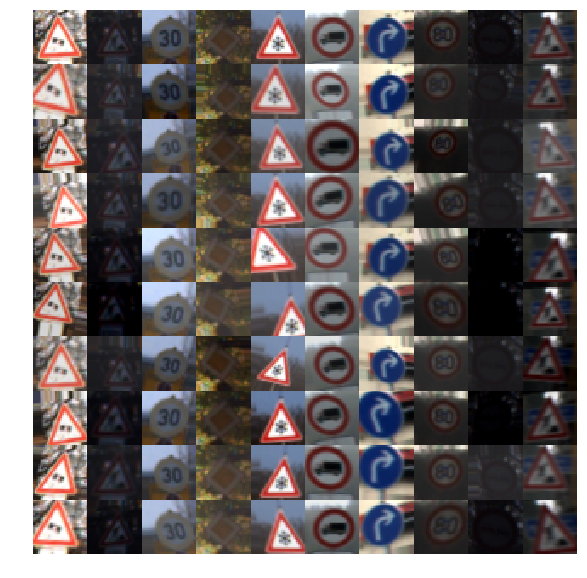

In [14]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from multiprocessing.pool import ThreadPool
import skimage.transform


class DataFlow(object):
    """Serve as a batchwise interface to the data. Returns batches of
    preprocessed and augmented data. Furthermore the preprocessing and
    augmentation steps are buffered and run in a new thread. All threads run
    on the same kernel but if we are training on a GPU the preprocessing and
    augmentation will run concurrently with the training process and we thus
    avoid that these operations become the bottleneck of the training
    procedure."""
    
    def __init__(self, X, y, batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.img_shape = X.shape[1:]
        self.init_transformations()
        self.pool = ThreadPool(1)
        self.indices = np.arange(self.X.shape[0])
        self.shuffle()
        self._async_next()


    def init_transformations(self):
        """Precompute transformation matrices that are needed for data
        augmentation."""
        shifts = (self.img_shape[0] // 2, self.img_shape[1] // 2)
        unshifts = (-self.img_shape[0] // 2, -self.img_shape[1] // 2)
        self.preshift = skimage.transform.SimilarityTransform(
                translation = shifts)
        self.postshift = skimage.transform.SimilarityTransform(
                translation = unshifts)


    def _async_next(self):
        self.buffer_ = self.pool.apply_async(self._next)


    def _next(self):
        """Get next full batch, handle bookkeeping and shuffling."""
        batch_start, batch_end = self.batch_start, self.batch_start + self.batch_size
        if batch_end > self.X.shape[0]:
            self.shuffle()
            return self._next()
        else:
            batch_indices = self.indices[batch_start:batch_end]
            X_batch, y_batch = self.X[batch_indices], self.y[batch_indices]
            X_batch, y_batch = self.process_batch(X_batch, y_batch)
            self.batch_start = batch_end
            return X_batch, y_batch


    def shuffle(self):
        np.random.shuffle(self.indices)
        self.batch_start = 0


    def process_batch(self, X, y):
        """Preprocess and augment batch."""
        # normalize to [-1.0, 1.0]
        X = X / 127.5 - 1.0

        for i in range(X.shape[0]):
            # scaling and bias for contrast and brightness augmentation
            scale = 1.0 + 0.1 * np.random.randn()
            bias = 0.0 + 0.1 * np.random.randn()
            X[i] = np.clip(scale*X[i] + bias, -1.0, 1.0)

            # transformations for geometric augmentations
            angle = 6.0 * np.random.randn()
            zoom = 1 + 0.1 * np.random.randn()
            translation = 2.0 * np.random.randn()
            shear = 0.1 * np.random.randn()

            trafo = skimage.transform.AffineTransform(
                    translation = translation,
                    rotation = np.deg2rad(angle),
                    scale = (zoom, zoom),
                    shear = shear)
            centered_trafo = (self.postshift + (trafo + self.preshift))
            X[i] = skimage.transform.warp(X[i], centered_trafo, mode = "edge", order = 1)
        return X, y


    def get_batch(self):
        """Get a batch and prepare next one asynchronuously."""
        result = self.buffer_.get()
        self._async_next()
        return result


    def batches_per_epoch(self):
        return math.ceil(self.X.shape[0] / self.batch_size)


class DataFlowValid(object):
    """Similiar to DataFlow but for validation/testing data. Does not
    shuffle nor augment."""

    def __init__(self, X, y, batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.pool = ThreadPool(1)
        self.batch_start = 0
        self._async_next()


    def _async_next(self):
        self.buffer_ = self.pool.apply_async(self._next)


    def _next(self):
        """Get next batch (possibly not of full batch size) and handle
        bookkeeping."""
        batch_start, batch_end = self.batch_start, self.batch_start + self.batch_size
        X_batch, y_batch = self.X[batch_start:batch_end], self.y[batch_start:batch_end]
        X_batch, y_batch = self.process_batch(X_batch, y_batch)
        if batch_end > self.X.shape[0]:
            self.batch_start = 0
        else:
            self.batch_start = batch_end
        return X_batch, y_batch


    def process_batch(self, X, y):
        """Preprocess batch."""
        # normalize to [-1.0, 1.0]
        X = X / 127.5 - 1.0
        return X, y


    def get_batch(self):
        """Get a batch and prepare next one asynchronuously."""
        result = self.buffer_.get()
        self._async_next()
        return result


    def batches_per_epoch(self):
        return math.ceil(self.X.shape[0] / self.batch_size)


def tile(X, rows, cols):
    """Tile images for display."""
    tiling = np.zeros((rows * X.shape[1], cols * X.shape[2], X.shape[3]), dtype = X.dtype)
    for i in range(rows):
        for j in range(cols):
            idx = i * cols + j
            if idx < X.shape[0]:
                img = X[idx,...]
                tiling[
                        i*X.shape[1]:(i+1)*X.shape[1],
                        j*X.shape[2]:(j+1)*X.shape[2],
                        :] = img
    return tiling


def visualize_augmentation(X, y):
    """Visualize effect of data augmentation."""
    n_samples = 10
    n_augmentations = 9
    Xbatches = DataFlow(X, y, 64)
    indices = Xbatches.indices[:n_samples]
    X_samples = X[indices]
    y_samples = y[indices]
    X_augmented = X_samples / 127.5  - 1.0
    for i in range(n_augmentations):
        x, _ = Xbatches.process_batch(X_samples, y_samples)
        X_augmented = np.concatenate([X_augmented, x])
    X_tiled = tile(X_augmented, n_augmentations + 1, n_samples)
    X_tiled = (X_tiled + 1.0) / 2.0

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111)
    ax.imshow(X_tiled)
    ax.set_axis_off()
    fig.savefig(os.path.join(img_dir, "data_augmentation.png"))
    
    
X, y = data["train"]
visualize_augmentation(X, y)

### Model Architecture

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf


def tf_conv(x, kernel_size, n_features, stride = 1):
    """Pass x through a convolutional layer."""
    # input shape
    x_shape = x.get_shape().as_list()
    assert(len(x_shape) == 4)
    x_features = x_shape[3]

    # weights and bias
    weight_shape = (kernel_size, kernel_size, x_features, n_features)
    weight_stddev = math.sqrt(2.0 / (kernel_size * kernel_size * n_features))
    weight = tf.Variable(
            tf.random_normal(weight_shape, mean = 0.0, stddev = weight_stddev))
    bias = tf.Variable(tf.zeros((n_features,)))

    # operation
    padding = "SAME"
    result = tf.nn.conv2d(
            x, weight,
            strides = (1, stride, stride, 1),
            padding = padding)
    result = tf.nn.bias_add(result, bias)
    return result


def tf_activate(x, keep_prob = 1.0):
    """Activate and drop x."""
    method = "relu"
    x = tf.nn.dropout(x, keep_prob = keep_prob)
    if method == "relu":
        return tf.nn.relu(x)
    elif method == "elu":
        return tf.nn.elu(x)


def tf_downsample(x):
    """Subsample x by a factor of two."""
    method = "stridedconv"
    if method == "maxpool":
        kernel_size = 3
        stride = 2
        padding = "SAME"
        return tf.nn.max_pool(
                x,
                ksize = (1, kernel_size, kernel_size, 1),
                strides = (1, stride, stride, 1),
                padding = padding)
    elif method == "stridedconv":
        x_shape = x.get_shape().as_list()
        assert(len(x_shape) == 4)
        x_features = x_shape[3]
        return tf_conv(x, 3, x_features, stride = 2)


def tf_flatten(x):
    """Flatten x to prepare as input for fc layer."""
    return tf.contrib.layers.flatten(x)


def tf_fc(x, n_features):
    """Pass x through fully connected layer."""
    # input shape
    x_shape = x.get_shape().as_list()
    assert(len(x_shape) == 2)
    x_features = x_shape[1]

    # weights and bias
    weight_shape = (x_features, n_features)
    weight_stddev = math.sqrt(2.0 / n_features)
    weight = tf.Variable(
            tf.random_normal(weight_shape, mean = 0.0, stddev = weight_stddev))
    bias = tf.Variable(tf.zeros((n_features,)))

    # operation
    result = tf.matmul(
            x, weight)
    result = tf.add(result, bias)
    return result


class TSCModel(object):
    """Traffic Sign Classifier. Expects batches with images normalized to
    [-1, 1]. Uses a simple architecture with four blocks of
    convolution-activation-downsampling followed by a two layer, fully
    connected classifier. Cross entropy is minimized by Adam with a learning
    rate decaying linearly from 1e-3 to 1e-8 in the specified number of
    steps."""

    def __init__(self, img_shape, n_labels, n_total_steps):
        self.session = tf.Session()
        self.img_shape = img_shape
        self.n_labels = n_labels
        self.n_total_steps = n_total_steps
        self.initial_learning_rate = 1e-3
        self.end_learning_rate = 0.0
        self.log_frequency = 1000
        self.logs = dict()
        self.define_graph()

    
    def define_graph(self):
        """Define tensorflow graph."""
        img_batch_shape = (None,) + self.img_shape
        label_batch_shape = (None,)
        # inputs
        self.x = tf.placeholder(tf.float32, shape = img_batch_shape)
        self.y = tf.placeholder(tf.int32, shape = label_batch_shape)
        self.keep_prob = tf.placeholder(tf.float32)

        kernel_size = 3
        n_channels = 32
        # architecture
        features = self.x
        for i in range(5):
            features = tf_conv(features, kernel_size, (i+1)*n_channels)
            features = tf_activate(features, keep_prob = self.keep_prob)
            features = tf_downsample(features)
        features = tf_flatten(features)
        features = tf_fc(features, 128)
        features = tf_activate(features, keep_prob = self.keep_prob)
        features = tf_fc(features, 64)
        features = tf_activate(features, keep_prob = self.keep_prob)
        self.logits = tf_fc(features, self.n_labels)

        # loss
        self.loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
                labels = self.y,
                logits = self.logits))
        # accuracy
        correct_logits = tf.equal(
                tf.cast(tf.argmax(self.logits, axis = 1), tf.int32),
                self.y)
        self.accuracy_op = tf.reduce_mean(tf.cast(correct_logits, tf.float32))
        # categorical probabilities
        self.categorical_probabilities = tf.nn.softmax(self.logits)

        self.global_step = tf.Variable(0, trainable = False)
        self.learning_rate = tf.train.polynomial_decay(
                learning_rate = self.initial_learning_rate,
                global_step = self.global_step,
                decay_steps = self.n_total_steps,
                end_learning_rate = self.end_learning_rate,
                power = 1.0)

        optimizer = tf.train.AdamOptimizer(
                learning_rate = self.learning_rate)
        self.train_op = optimizer.minimize(
                self.loss_op,
                global_step = self.global_step)

        # init
        self.session.run(tf.global_variables_initializer())


    def fit(self, batches, batches_valid):
        """Fit model to dataset and evaluate on validation set."""
        self.batches = batches
        self.batches_valid = batches_valid
        for batch in range(self.n_total_steps):
            X_batch, y_batch = batches.get_batch()
            feed_dict = {
                    self.x: X_batch,
                    self.y: y_batch,
                    self.keep_prob: 0.85}
            fetch_dict = {
                    "train": self.train_op,
                    "loss": self.loss_op,
                    "accuracy": self.accuracy_op,
                    "global_step":  self.global_step,
                    "learning_rate": self.learning_rate}
            result = self.session.run(fetch_dict, feed_dict)
            self.log_training(batch, total_batches, result)


    def log_training(self, batch, total_batches, result):
        """Keep average of training metrics and log them together with
        validation metrics."""
        metrics = ["loss", "accuracy"]
        for metric in metrics:
            if metric not in self.logs:
                self.logs[metric] = []
            self.logs[metric].append(result[metric])
        if batch % self.log_frequency == 0 or batch + 1 == total_batches:
            print("Batch {} / {} = {:.2f} %".format(batch, total_batches, 100 * batch / total_batches))
            print("{:20}: {}".format("Global step", result["global_step"]))
            print("{:20}: {:.4e}".format("Learning rate", result["learning_rate"]))
            for metric in metrics:
                metric_logs = self.logs[metric]
                average = sum(metric_logs) / len(metric_logs)
                print("{:20}: {:.4}".format("Training " + metric, average))
                self.logs[metric] = []
            val_metrics = self.evaluate(self.batches_valid)
            for k, v in val_metrics.items():
                print("{:20}: {:.4}".format("Validation " + k, v))


    def evaluate(self, batches):
        """Evaluate metrics averaged over one epoch."""
        total_batches = batches.batches_per_epoch()
        logs = dict()
        for batch in range(total_batches):
            X_batch, y_batch = batches.get_batch()
            feed_dict = {
                    self.x: X_batch,
                    self.y: y_batch,
                    self.keep_prob: 1.0}
            fetch_dict = {
                    "loss": self.loss_op,
                    "accuracy": self.accuracy_op}
            result = self.session.run(fetch_dict, feed_dict)
            for metric in result:
                if not metric in logs:
                    logs[metric] = []
                logs[metric].append(result[metric])
        for metric in logs:
            logs[metric] = sum(logs[metric]) / len(logs[metric])
        return logs


    def evaluate_probabilities(self, batches):
        """Evaluate categorical probabilities for each sample."""
        total_batches = batches.batches_per_epoch()
        catprobs = []
        for batch in range(total_batches):
            X_batch, y_batch = batches.get_batch()
            feed_dict = {
                    self.x: X_batch,
                    self.y: y_batch,
                    self.keep_prob: 1.0}
            fetch_dict = {
                    "catprobs": self.categorical_probabilities}
            result = self.session.run(fetch_dict, feed_dict)
            catprobs.append(result["catprobs"])
        catprobs = np.concatenate(catprobs)
        return catprobs

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

X, y = data["train"]
batch_size = 64
batches = DataFlow(X, y, batch_size)
X_valid, y_valid = data["valid"]
batches_valid = DataFlowValid(X_valid, y_valid, batch_size)

img_shape = X.shape[1:]
n_labels = np.unique(y).shape[0]
n_epochs = 100
total_batches = batches.batches_per_epoch() * n_epochs
model = TSCModel(img_shape, n_labels, total_batches)
model.fit(batches, batches_valid)

Batch 0 / 54400 = 0.00 %
Global step         : 1
Learning rate       : 1.0000e-03
Training loss       : 3.957
Training accuracy   : 0.03125
Validation accuracy : 0.04622
Validation loss     : 3.732
Batch 1000 / 54400 = 1.84 %
Global step         : 1001
Learning rate       : 9.8162e-04
Training loss       : 1.759
Training accuracy   : 0.4874
Validation accuracy : 0.8716
Validation loss     : 0.4133
Batch 2000 / 54400 = 3.68 %
Global step         : 2001
Learning rate       : 9.6324e-04
Training loss       : 0.6251
Training accuracy   : 0.8175
Validation accuracy : 0.9194
Validation loss     : 0.261
Batch 3000 / 54400 = 5.51 %
Global step         : 3001
Learning rate       : 9.4485e-04
Training loss       : 0.4513
Training accuracy   : 0.8748
Validation accuracy : 0.9561
Validation loss     : 0.163
Batch 4000 / 54400 = 7.35 %
Global step         : 4001
Learning rate       : 9.2647e-04
Training loss       : 0.382
Training accuracy   : 0.898
Validation accuracy : 0.9561
Validation loss     

Batch 40000 / 54400 = 73.53 %
Global step         : 40001
Learning rate       : 2.6471e-04
Training loss       : 0.08114
Training accuracy   : 0.9811
Validation accuracy : 0.9885
Validation loss     : 0.05115
Batch 41000 / 54400 = 75.37 %
Global step         : 41001
Learning rate       : 2.4632e-04
Training loss       : 0.07431
Training accuracy   : 0.9829
Validation accuracy : 0.9873
Validation loss     : 0.05582
Batch 42000 / 54400 = 77.21 %
Global step         : 42001
Learning rate       : 2.2794e-04
Training loss       : 0.07172
Training accuracy   : 0.9833
Validation accuracy : 0.9894
Validation loss     : 0.04623
Batch 43000 / 54400 = 79.04 %
Global step         : 43001
Learning rate       : 2.0956e-04
Training loss       : 0.06802
Training accuracy   : 0.9842
Validation accuracy : 0.99
Validation loss     : 0.04418
Batch 44000 / 54400 = 80.88 %
Global step         : 44001
Learning rate       : 1.9118e-04
Training loss       : 0.06235
Training accuracy   : 0.9851
Validation accur

In [17]:
# finally test on original test set
X_test, y_test = data["test"]
batches_test = DataFlowValid(X_test, y_test, batch_size)
metrics = model.evaluate(batches_test)
for k, v in metrics.items():
    print("{:20}: {:.4}".format("Testing " + k, v))

Testing accuracy    : 0.9881
Testing loss        : 0.09034


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# path to additional test images
test_dir = os.path.join(os.getcwd(), "test_images")

def load_test_data():
    """Load additional testing data."""
    X = []
    y = []
    for fname in os.listdir(test_dir):
        label = int(fname.split("_")[0])
        img = plt.imread(os.path.join(test_dir, fname))
        X.append(img)
        y.append(label)
    X = np.stack(X)
    y = np.stack(y)
    return X, y

X_test, y_test = load_test_data()

### Predict the Sign Type for Each Image

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

batches_test = DataFlowValid(X_test, y_test, batch_size)
# get categorical probabilities for visualization
catprobs = model.evaluate_probabilities(batches_test)
print("Predictions: {}".format(np.argmax(catprobs, axis = 1)))

Predictions: [12  9  1 29 24 35 38 17 12 12 25 39  1  1]


### Analyze Performance

In [21]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
metrics = model.evaluate(batches_test)
for k, v in metrics.items():
    print("{:20}: {:.4}".format("Additional Testing " + k, v))

Additional Testing accuracy: 1.0
Additional Testing loss: 0.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

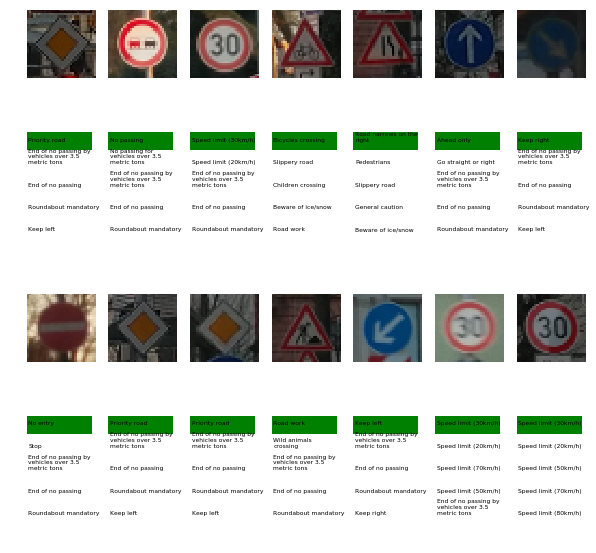

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def visualize_test_results(X, y, pred, signnames):
    """Visualize images and their predicted class probabilities."""
    assert(X.shape[0] == 14)
    nrows = 2
    ncols = 7
    nlabels = 43
    fig, axes = plt.subplots(nrows = 2 * nrows, ncols = ncols, figsize = (10, 10))
    for i in range(nrows):
        for j in range(ncols):
            aximg = axes[2*i, j]
            axprobs = axes[2*i + 1, j]
            idx = i*ncols + j

            img = X[idx]
            aximg.imshow(img)
            aximg.set_axis_off()

            probs = pred[idx]
            label = y[idx]
            colors = probs.shape[0] * ["red"]
            colors[label] = "green"

            n_top = 5
            topindices = sorted(np.arange(probs.shape[0]), key = lambda i: probs[i])[-n_top:]
            topprobs = probs[topindices]
            topcolors = [colors[i] for i in topindices]
            ypos = np.arange(n_top)
            axprobs.barh(ypos, topprobs, color = topcolors)
            axprobs.set_yticks(ypos)
            for ypos, l in zip(ypos, topindices):
                axprobs.text(0.025, ypos, textwrap.fill(signnames[l], 20), fontsize = 6)
            axprobs.set_axis_off()
    fig.savefig(os.path.join(img_dir, "test_results.png"))
    
    
visualize_test_results(X_test, y_test, catprobs, signnames)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")